In [5]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import brewer2mpl
import os


# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=True)

def remove_splines(ax, spl):
    for s in spl:
        ax.spines[s].set_visible(False)  

def modify_splines(ax, lwd, col):    
    for s in ['bottom', 'left','top','right']:
        ax.spines[s].set_linewidth(lwd)
        ax.spines[s].set_color(col)    

def ggplot(ax):
    
    modify_splines(ax, lwd=0.75, col='0.8')
    remove_splines(ax, ['top','right'])
    
    ax.patch.set_facecolor('0.93')
    ax.yaxis.grid(True, 'major', color='0.98', linestyle='-', linewidth=1.0)
    
    ax.set_axisbelow(True)   
    
    
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        
        if (height != 0):
            ax.text(rect.get_x() + rect.get_width()/2., 1.015*height,
                    '%.1f' % float(height),
                    ha='center', va='bottom', fontsize=12)

['bubble_sort', 'sum_n_natural', 'stencil', 'vector_add', 'factorial', 'gcd', 'addition']
[0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33]
[0.77, 0.7, 0.75, 0.78, 0.68, 0.47, 0.82]


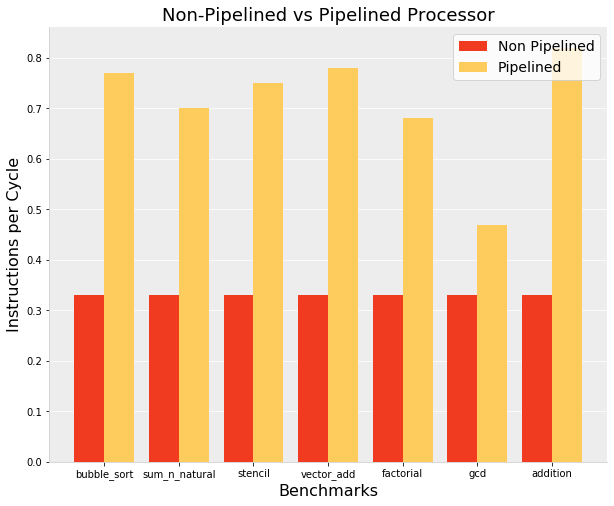

In [36]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

color = brewer2mpl.get_map('YlOrRd', 'Sequential', 5).mpl_colors

## Get result directories
programs = [x[0] for x in os.walk('.')]
programs.remove('./.ipynb_checkpoints')
programs.remove('.')
programs = [x[2:] for x in programs]

## Read results
non_pipelined_results = []
pipelined_results     = []

for p in programs:
    file = open(p+"/non-pipelined.log", "r")
    line_n = 0
    for line in file:
        if line_n == 4:
            non_pipelined_results.append(float(line.split(' = ')[1]))
        line_n+=1
    file.close()
    
    file = open(p+"/pipelined.log", "r")
    line_n = 0
    for line in file:
        if line_n == 4:
            pipelined_results.append(float(line.split(' = ')[1]))
        line_n+=1
    file.close()
        
print(programs)
print(non_pipelined_results)
print(pipelined_results)


# data to plot
n_groups = len(programs)

index = np.arange(n_groups)
bar_width = 0.4
opacity = 1.0
 
rects1 = plt.bar(index, non_pipelined_results, bar_width,
                 alpha=opacity,color=color[3],label='Non Pipelined')
rects2 = plt.bar(index+bar_width, pipelined_results, bar_width,
                 alpha=opacity,color=color[1],label='Pipelined')


ax.set_xlabel('Benchmarks', fontsize=16)
ax.set_ylabel('Instructions per Cycle', fontsize=16)
ax.set_title('Non-Pipelined vs Pipelined Processor', fontsize=18)

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

plt.xticks(index + 0.5*bar_width, programs)

ax.legend(fontsize=14)
ggplot(ax)
plt.savefig("pipelined_experiment.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()